## Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
car=pd.read_csv("Clustering_cardata.csv")

## Exploring data and checking for any missing values

In [3]:
car.shape

(25, 18)

In [4]:
car.head()

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1


In [5]:
car.dtypes

Resp.Id                            int64
Indian Technlogy high order        int64
Buy Made in India                  int64
Value for money                    int64
Convenience over style             int64
Don't do waste full expenditure    int64
No compromise on safety            int64
Saver not spender                  int64
Try new things                     int64
Be part of a changing world        int64
Purchase Intentions                int64
Occupation                         int64
Family income                      int64
Family size                        int64
Marital Status                     int64
Education                          int64
Age                                int64
Nature of Job                      int64
dtype: object

In [6]:
car.describe()

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.0,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,3.000000,3.080000,2.720000,2.600000,2.520000,2.60000,2.4,2.56000,2.440000,0.480000,2.040000,2.840000,2.200000,1.480000,3.080000,2.120000,1.360000
std,7.359801,1.322876,1.525341,1.369915,1.290994,1.388044,1.47196,1.5,1.75784,1.529706,0.509902,0.454606,1.143095,0.707107,0.509902,0.276887,0.832666,0.757188
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000
25%,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.00000,1.0,1.00000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,13.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.00000,2.0,2.00000,2.000000,0.000000,2.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000
75%,19.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.00000,4.0,5.00000,4.000000,1.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,1.000000
max,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.00000,5.000000,1.000000,3.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000


In [7]:
car.isna().sum(axis=0)

Resp.Id                            0
Indian Technlogy high order        0
Buy Made in India                  0
Value for money                    0
Convenience over style             0
Don't do waste full expenditure    0
No compromise on safety            0
Saver not spender                  0
Try new things                     0
Be part of a changing world        0
Purchase Intentions                0
Occupation                         0
Family income                      0
Family size                        0
Marital Status                     0
Education                          0
Age                                0
Nature of Job                      0
dtype: int64

## No missing values

In [8]:
car.drop('Resp.Id',inplace=True,axis=1)

## Dropping ID column, now our data is ready for implementing model

## We have different clustering algorithms like K-means, k-mode and heirarchical clustering. 
## Since, in the provided case we are given ordinal data and not categorical, we can use either k-means or heirarchical clustering.

## We will use k means clustering, but for it we need to know optimal value of k. This can be done by making scree plot. In general from business perspective 3 can be the ideal number of clusters as it will be a good balance to differentiate different user types based on small dataset.

In [9]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10, 
    "max_iter": 300,
    "random_state": 42,
 }

In [10]:
 sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(car.iloc[:,0:17])
        sse.append(kmeans.inertia_)

C:\Users\shilp\anaconda3\envs\symbihello\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


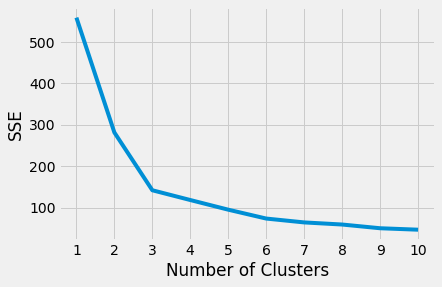

In [11]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Even from scree plot, 3 seems to be optimal number of clusters

In [12]:

clmodel=KMeans(n_clusters=3,random_state=100)
clmodel.fit(car.iloc[:,0:17])

KMeans(n_clusters=3, random_state=100)

In [13]:
Labels=clmodel.predict(car.iloc[:,0:17])

In [14]:
print(type(Labels))
Labels

<class 'numpy.ndarray'>


array([0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       0, 0, 1])

## Getting cluster centers

In [15]:
clmodel.cluster_centers_

array([[4.4       , 4.7       , 2.7       , 2.1       , 2.8       ,
        2.6       , 2.6       , 1.2       , 1.4       , 0.7       ,
        1.8       , 3.4       , 2.4       , 1.3       , 3.        ,
        2.8       , 1.2       ],
       [2.        , 2.22222222, 1.44444444, 1.77777778, 1.        ,
        1.22222222, 1.        , 4.77777778, 4.33333333, 0.55555556,
        2.22222222, 2.77777778, 1.88888889, 1.33333333, 3.22222222,
        1.22222222, 1.44444444],
       [2.16666667, 1.66666667, 4.66666667, 4.66666667, 4.33333333,
        4.66666667, 4.16666667, 1.5       , 1.33333333, 0.        ,
        2.16666667, 2.        , 2.33333333, 2.        , 3.        ,
        2.33333333, 1.5       ]])

In [16]:
Cluster_Name=pd.Series(Labels)

In [17]:
Cluster_Name=Cluster_Name.to_frame(name="Cluster_Name")

In [18]:
newcldata=pd.concat([car.iloc[:,0:17],Cluster_Name],axis=1)
print(newcldata.columns)
newcldata.head(5)

Index(['Indian Technlogy high order', 'Buy Made in India', 'Value for money',
       'Convenience over style', 'Don't do waste full expenditure',
       'No compromise on safety', 'Saver not spender', 'Try new things',
       'Be part of a changing world', 'Purchase Intentions', 'Occupation',
       'Family income', 'Family size', 'Marital Status', 'Education', 'Age',
       'Nature of Job', 'Cluster_Name'],
      dtype='object')


,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Cluster_Name
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,0
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,1
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,0
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2


## Based on the values of cluster centers as shown in table: 


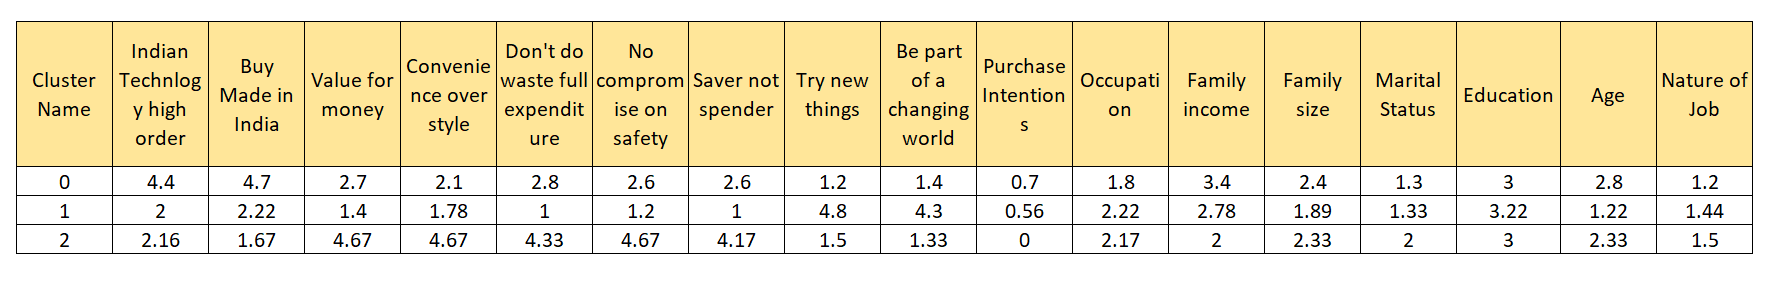


## Cluster Name 0: People belonging to this category have high respect for Indian technology and buy indian cars. They have medium value for money and highest incomes. They do not try new things and have high purchase intentions. They are mostly old people.

## Cluster Name 1: People belonging to this category do not have affinity to buy Indian cars, they value money much less and have better incomes than cluster 2. They are fond of trying out new things are mostly young.

## Cluster Name 2: These people are least likely to buy made in India cars. They earn less and have very high value for money. They save money and most likely to be single. They do not have any purchase intentions.

## So, cluster Name 0 can be named as "Old, rich Indian car fans"
## Cluster Name 1 can be named as "Spendthrift, Novelty seeking youth"
## Cluster Name 2 can be named as "Middle class singles with less intention to purchase car"

In [19]:
newcldata.Cluster_Name.replace((0,1,2),('Old, rich Indian car fans',"Spendthrift, Novelty seeking youth","Middle class singles with less intention to purchase car"),inplace=True)

In [20]:
newcldata.head(5)

,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Cluster_Name
0,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,"Old, rich Indian car fans"
1,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,Middle class singles with less intention to pu...
2,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,"Spendthrift, Novelty seeking youth"
3,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,"Old, rich Indian car fans"
4,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,Middle class singles with less intention to pu...
